In [7]:
pip install langdetect

In [8]:
pip install emoji

In [9]:
import pandas as pd
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
import emoji
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from scipy.sparse import hstack

In [10]:
nltk.download("vader_lexicon")
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
def detectar(texto):
  try:
    return detect(texto)
  except:
    return "unknown"

In [12]:
df = pd.read_csv("/content/hashed_wab_reviews.csv")

In [13]:
dfCopy = df.copy()

In [14]:
dfCopy.head(3)

,id,date,userName,userUrl,version,score,title,text,url,country,appId
0,10990027692,2024-02-28T13:15:16-07:00,a71209417cc69068db96287dcfa258e84a19b36c443521...,c6434d50f03dc3225343d08cb75b120e19dc21937007da...,24.4.78,1,Status sounds,No sound comes from status videos after I upda...,https://itunes.apple.com/au/review?id=13864129...,AU,1386412985
1,10939311897,2024-02-14T14:47:02-07:00,9f7302dde70e971b057aa14cec1d26479a9362da32e9ed...,55105d432b1d6c664523f5de2576a199f8ffa8d8c20e8a...,24.3.76,2,Calls,"Every time I’m on a phone call, it either cut ...",https://itunes.apple.com/au/review?id=13864129...,AU,1386412985
2,10932303253,2024-02-12T15:54:56-07:00,ee939200223a21c2bdea5d17ef0ae2d9a03acfbb914c73...,1c044d9599692ebd0d50f4fb8d886f622ee02c549d76f8...,24.3.76,4,Recommendations,I like being to have a separate account/app fo...,https://itunes.apple.com/au/review?id=13864129...,AU,1386412985


In [15]:
dfCopy.shape

(1459, 11)

In [16]:
dfCopy.describe()

,id,score,appId
count,1.459000e+03,1459.000000,1.459000e+03
mean,9.372247e+09,3.133653,1.386413e+09
std,1.782619e+09,1.764405,0.000000e+00
min,3.993157e+09,1.000000,1.386413e+09
25%,8.411967e+09,1.000000,1.386413e+09
50%,1.028037e+10,3.000000,1.386413e+09
75%,1.065195e+10,5.000000,1.386413e+09
max,1.101599e+10,5.000000,1.386413e+09


In [17]:
dfCopy.columns

Index(['id', 'date', 'userName', 'userUrl', 'version', 'score', 'title',
       'text', 'url', 'country', 'appId'],
      dtype='object')

In [18]:
dfCopy = dfCopy.drop(columns = ["userUrl", "url"])

In [19]:
dfCopy.dtypes

,0
id,int64
date,object
userName,object
version,object
score,int64
title,object
text,object
country,object
appId,int64


In [20]:
dfCopy["date"] = pd.to_datetime(dfCopy["date"], errors="coerce")

In [21]:
dfCopy["date"].iloc[0]

Timestamp('2024-02-28 13:15:16-0700', tz='UTC-07:00')

In [22]:
dfCopy["dateCompleta"] = dfCopy["date"].dt.date
dfCopy["year"] = dfCopy["date"].dt.year
dfCopy["month"] = dfCopy["date"].dt.month
dfCopy["day"] = dfCopy["date"].dt.day
dfCopy["time"] = dfCopy["date"].dt.time

In [23]:
dfCopy.columns

Index(['id', 'date', 'userName', 'version', 'score', 'title', 'text',
       'country', 'appId', 'dateCompleta', 'year', 'month', 'day', 'time'],
      dtype='object')

In [24]:
dfCopy = dfCopy[["id", "dateCompleta", "date", "year", "month", "day", "time", "country", "userName", "appId", "version", "score", "title", "text"]]

In [25]:
dfCopy["country"].unique()

array(['AU', 'LK', 'CA', 'US'], dtype=object)

In [26]:
dfCopy["country"].value_counts()

,count
country,
LK,552
US,500
CA,290
AU,117


In [27]:
dfCopy["appId"].unique()

array([1386412985])

In [28]:
dfCopy["version"].value_counts()

,count
version,
23.25.86,114
23.23.82,88
23.23.79,70
24.2.75,55
24.1.80,48
...,...
2.21.160,1
2.20.30,1
2.20.50,1


In [29]:
dfCopy["score"].unique()

array([1, 2, 4, 5, 3])

In [30]:
dfCopy["title"].isna().sum()

np.int64(0)

In [31]:
dfCopy["title"] = dfCopy["title"].str.lower()

In [32]:
dfCopy["text"].isna().sum()

np.int64(0)

In [33]:
dfCopy["text"] = dfCopy["text"].str.lower()

In [34]:
"""
es español
en ingles
fr frances
pt portugues
de aleman
ru ruso
it italiano
cs checo
"""

'\nes español\nen ingles\nfr frances\npt portugues\nde aleman\nru ruso\nit italiano\ncs checo\n'

In [35]:
dfCopy.loc[dfCopy["title"] == "10/10", "title"] = "great service"
dfCopy.loc[dfCopy["title"] == "🙂", "title"] = "great service"
dfCopy.loc[dfCopy["title"] == "???", "title"] = "confused"
dfCopy.loc[dfCopy["title"] == "🤦🤦", "title"] = "error"
dfCopy.loc[dfCopy["title"] == "😡", "title"] = "bad"

In [36]:
dfCopy["idioma_title"] = dfCopy["title"].apply(detectar)

In [37]:
dfCopy["idioma_title"].value_counts()

,count
idioma_title,
en,747
af,73
fr,62
so,58
it,51
tl,50
es,38
ro,28
cy,25


In [38]:
dfCopy["idioma_texto"] = dfCopy["text"].apply(detectar)

In [39]:
dfCopy["idioma_texto"].value_counts()

,count
idioma_texto,
en,1164
es,50
fr,40
ar,29
so,25
af,22
unknown,17
ca,14
id,9


In [40]:
dfCopy[["idioma_title", "idioma_texto"]]

,idioma_title,idioma_texto
0,en,en
1,ca,en
2,fr,en
3,en,en
4,en,en
...,...,...
1454,ar,ar
1455,af,en
1456,ar,ar
1457,es,es


In [41]:
#dfCopy[dfCopy["idioma_title"] == dfCopy["idioma_texto"]]

In [42]:
dfCopy["title"] = (dfCopy["title"].str.replace(r"^subject\s*", "", regex=True))

In [43]:
(dfCopy["title"] != dfCopy["title"].str.strip()).value_counts()

,count
title,
False,1459


In [44]:
(dfCopy["title"].str.contains(r"[^\x00-\x7F]", regex=True)).sum()
dfCopy.loc[dfCopy["title"].str.contains(r"[\x00-\x7F]", regex=True)]

,id,dateCompleta,date,year,month,day,time,country,userName,appId,version,score,title,text,idioma_title,idioma_texto
0,10990027692,2024-02-28,2024-02-28 13:15:16-07:00,2024,2,28,13:15:16,AU,a71209417cc69068db96287dcfa258e84a19b36c443521...,1386412985,24.4.78,1,status sounds,no sound comes from status videos after i upda...,en,en
1,10939311897,2024-02-14,2024-02-14 14:47:02-07:00,2024,2,14,14:47:02,AU,9f7302dde70e971b057aa14cec1d26479a9362da32e9ed...,1386412985,24.3.76,2,calls,"every time i’m on a phone call, it either cut ...",ca,en
2,10932303253,2024-02-12,2024-02-12 15:54:56-07:00,2024,2,12,15:54:56,AU,ee939200223a21c2bdea5d17ef0ae2d9a03acfbb914c73...,1386412985,24.3.76,4,recommendations,i like being to have a separate account/app fo...,fr,en
3,10859859638,2024-01-24,2024-01-24 12:47:22-07:00,2024,1,24,12:47:22,AU,10c5a49c9a79ddf4cd973abd6f125b5bf98d9e6cf22fbd...,1386412985,24.1.80,5,: request for premium features in whatsapp aus...,"dear whatsapp support team,\n\ni hope this mes...",en,en
4,10758670982,2023-12-29,2023-12-29 05:13:49-07:00,2023,12,29,05:13:49,AU,83481ba5686098a9f7b2b9e374dc5ed7a3627bcd5eb28f...,1386412985,23.25.86,2,not satisfied yet,only seems like someone clicks on your ad when...,en,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,10496943118,2023-10-20,2023-10-20 14:19:43-07:00,2023,10,20,14:19:43,US,02c651efe913547d1a0004103f605c7c20fdc9f8cc384d...,1386412985,23.21.70,1,مفيش حرية تعبير,مفيش حرية تعبير,ar,ar
1455,10496461023,2023-10-20,2023-10-20 11:11:05-07:00,2023,10,20,11:11:05,US,f4be00febd0851047acce181b885b8f759dbe597f90160...,1386412985,23.21.70,5,wassap review,satisfactory,af,en
1456,10496331338,2023-10-20,2023-10-20 10:24:15-07:00,2023,10,20,10:24:15,US,325d8d5a6fc96d2f647943c3a73fd363a865a79991d9d7...,1386412985,23.21.70,5,افضل تطبيق,افضل تطبيق تواصل بلا منازع و خاصة بعد التحديثا...,ar,ar
1457,10496216785,2023-10-20,2023-10-20 09:44:47-07:00,2023,10,20,09:44:47,US,4ae4744cb80d9d0c42c8b7a4807fd72307263d2d06d52b...,1386412985,23.21.70,1,se cierra,la app se me cierra sola al momento de enviar ...,es,es


In [45]:
def limpieza(df, col):
  df[col] = (
      df[col]
      .astype(str)
      .str.replace(r"[\n\r\t]", " ", regex=True)
      .str.replace(":", " ", regex=False)
      .str.replace(r"\s+", " ", regex=True)
      .str.strip()
  )
  return df

In [46]:
dfCopy["title"] = (
    dfCopy["title"]
    .astype(str)
    .str.replace(r"[^a-zA-Z0-9\s]", "", regex=True)
)

In [47]:
dfCopy["text"] = (
    dfCopy["text"]
    .astype(str)
    .str.replace(r"[^a-zA-Z0-9\s]", "", regex=True)
)

In [48]:
dfCopy = limpieza(dfCopy, "title")

In [49]:
dfCopy = limpieza(dfCopy, "text")

In [50]:
def remove_emojis(text):
  if not isinstance(text, str):
    return text
  return emoji.replace_emoji(text, replace="")

In [51]:
dfCopy["text"] = dfCopy["text"].apply(remove_emojis)
dfCopy["title"] = dfCopy["title"].apply(remove_emojis)

In [52]:
#dfCopy = dfCopy[~((dfCopy["idioma_title"] == "ar") & (dfCopy["idioma_texto"] == "ar"))]

In [53]:
dfCopy = dfCopy[(dfCopy["idioma_texto"] == "en") & (dfCopy["idioma_title"] == "en")]

In [54]:
dfCopy.shape

(699, 16)

In [55]:
dfCopy

,id,dateCompleta,date,year,month,day,time,country,userName,appId,version,score,title,text,idioma_title,idioma_texto
0,10990027692,2024-02-28,2024-02-28 13:15:16-07:00,2024,2,28,13:15:16,AU,a71209417cc69068db96287dcfa258e84a19b36c443521...,1386412985,24.4.78,1,status sounds,no sound comes from status videos after i upda...,en,en
3,10859859638,2024-01-24,2024-01-24 12:47:22-07:00,2024,1,24,12:47:22,AU,10c5a49c9a79ddf4cd973abd6f125b5bf98d9e6cf22fbd...,1386412985,24.1.80,5,request for premium features in whatsapp austr...,dear whatsapp support team i hope this message...,en,en
4,10758670982,2023-12-29,2023-12-29 05:13:49-07:00,2023,12,29,05:13:49,AU,83481ba5686098a9f7b2b9e374dc5ed7a3627bcd5eb28f...,1386412985,23.25.86,2,not satisfied yet,only seems like someone clicks on your ad when...,en,en
5,10745591318,2023-12-25,2023-12-25 21:11:41-07:00,2023,12,25,21:11:41,AU,abf9040f6eec5c83ff0cabb20346274caa6b8d81102343...,1386412985,23.25.86,5,great app,easy to use great app very effective,en,en
6,10661621070,2023-12-05,2023-12-05 16:43:45-07:00,2023,12,5,16:43:45,AU,c83b0069a2af6f996db998f9e2ef1a7e585cadd9b817b0...,1386412985,23.24.73,3,app crashes,app is crashing and asking to restart everytim...,en,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,10506042188,2023-10-23,2023-10-23 00:55:13-07:00,2023,10,23,00:55:13,US,ded03e6e0ef29c26a73e8800ad3fb525ab82fa5ce7ec0d...,1386412985,23.21.77,1,whatapp business,just re update this app this one is rubbish,en,en
1446,10505039469,2023-10-22,2023-10-22 16:45:44-07:00,2023,10,22,16:45:44,US,a570f01550d2ce395c80d6e39c75a270dbe3a10b732721...,1386412985,23.21.77,1,hangs while forwarding msg,it hangs for a few seconds whenever i try to f...,en,en
1447,10501284351,2023-10-21,2023-10-21 17:20:07-07:00,2023,10,21,17:20:07,US,8ddeaf939ed962904a3ac7d1609905ab1ef746c50fc002...,1386412985,23.21.77,1,i love texting my friend and all that so thank...,okay she was a fairy,en,en
1449,10500703550,2023-10-21,2023-10-21 13:14:41-07:00,2023,10,21,13:14:41,US,ed5e4a8d653385d06966901cdf578d4088bd06f79d5b31...,1386412985,23.21.77,5,nice business whats app,hi this is a good business whats app for every...,en,en


In [56]:
dfCopy.loc[dfCopy["score"] >= 3, "scoreCat"] = "buena"
dfCopy.loc[dfCopy["score"] < 3, "scoreCat"] = "mala"

In [57]:
sia = SentimentIntensityAnalyzer()

In [58]:
dfCopy["text_sentimentScore"] = dfCopy["text"].apply(sia.polarity_scores)

In [59]:
dfCopy["title_sentimentScore"] = dfCopy["title"].apply(sia.polarity_scores)

In [60]:
scores_df = dfCopy["text_sentimentScore"].apply(pd.Series)
dfCopy = pd.concat([dfCopy, scores_df], axis=1)
dfCopy["sentiment_text"] = "neutral"

In [61]:
dfCopy = dfCopy.rename(columns={
    "neg":"neg_text",
    "neu":"neu_text",
    "pos":"pos_text",
    "compound":"compound_text"
})

In [62]:
dfCopy.loc[dfCopy["compound_text"] > 0.05, "sentiment_text"] = "positive"
dfCopy.loc[dfCopy["compound_text"] < -0.05, "sentiment_text"] = "negative"

In [63]:
scores_df = dfCopy["title_sentimentScore"].apply(pd.Series)
dfCopy = pd.concat([dfCopy, scores_df], axis=1)
dfCopy["sentiment_title"] = "neutral"

In [64]:
dfCopy = dfCopy.rename(columns={
    "neg":"neg_title",
    "neu":"neu_title",
    "pos":"pos_title",
    "compound":"compound_title"
})

In [65]:
dfCopy.loc[dfCopy["compound_title"] > 0.05,  "sentiment_title"] = "positive"
dfCopy.loc[dfCopy["compound_title"] < -0.05, "sentiment_title"] = "negative"

In [66]:
#neg proporcion del texto negativa
#pos proporcion del texto positiva
#neu proporcion del texto neutral
#compound >= .05 positivo
#<= -.05 negativo
#entre -0.05 y 0.05 neutral

In [67]:
dfCopy.columns

Index(['id', 'dateCompleta', 'date', 'year', 'month', 'day', 'time', 'country',
       'userName', 'appId', 'version', 'score', 'title', 'text',
       'idioma_title', 'idioma_texto', 'scoreCat', 'text_sentimentScore',
       'title_sentimentScore', 'neg_text', 'neu_text', 'pos_text',
       'compound_text', 'sentiment_text', 'neg_title', 'neu_title',
       'pos_title', 'compound_title', 'sentiment_title'],
      dtype='object')

In [68]:
dfCopy[["compound_title","compound_text"]].corr()

,compound_title,compound_text
compound_title,1.000000,0.369999
compound_text,0.369999,1.000000


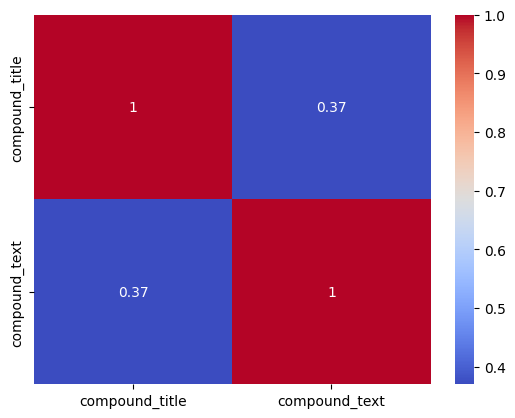

In [69]:
sb.heatmap(
    dfCopy[["compound_title","compound_text"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.show()
#relación debil entre titulo y texto, los titulos no son claros

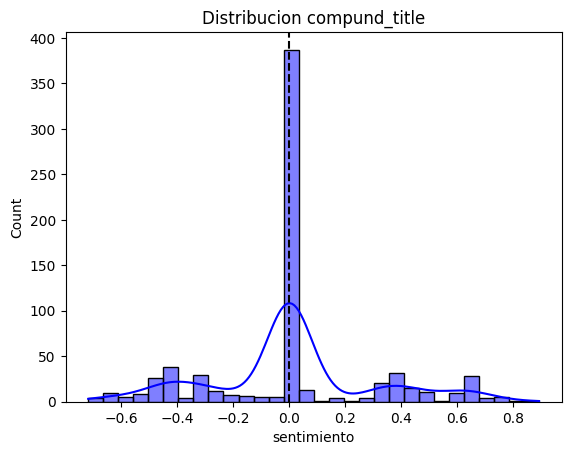

In [70]:
sb.histplot(
    dfCopy["compound_title"],
    bins=30,
    kde=True,
    color="blue"
)
plt.axvline(0, color="black", linestyle="--")
plt.title("Distribucion compund_title")
plt.xlabel("sentimiento")
plt.show()

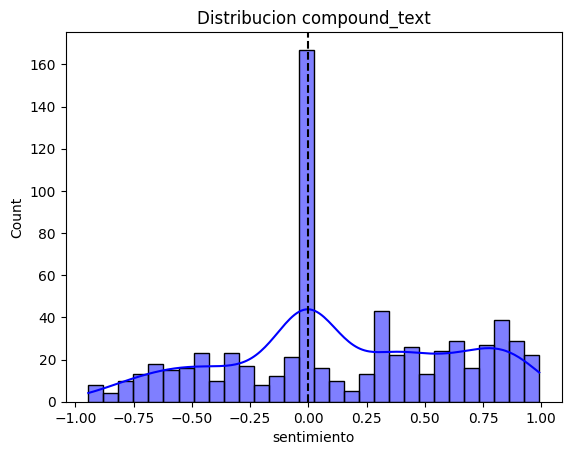

In [71]:
sb.histplot(
    dfCopy["compound_text"],
    bins=30,
    kde=True,
    color="blue"
)
plt.axvline(0, color="black", linestyle="--")
plt.title("Distribucion compound_text")
plt.xlabel("sentimiento")
plt.show()

In [72]:
dfCopy["compound_avg"] = dfCopy[["compound_title","compound_text"]].mean(axis=1)

In [73]:
#EL SCORE Y LA OPINION ES MODERADAMENTE CORRELACIONADA
compXscore = dfCopy["score"].corr(dfCopy["compound_avg"])
print("Correlacion entre score y compound_avg", compXscore)

Correlacion entre score y compound_avg 0.5377332637670805


In [74]:
  #MODELO CON 3 VARIABLES DERIVADAS DE VADER

In [127]:
#variable categorica a estimar
#tomando en cuenta compound avg y score construimos la variable

#dfCopy["calidadNum"] = ((dfCopy["compound_avg"] > 0.05) & (dfCopy["score"] > 3)).astype(int)
dfCopy["calidadNum"] = ((dfCopy["score"] > 3)).astype(int)

In [128]:
X = dfCopy[["compound_title", "compound_text", "compound_avg"]]

In [129]:
y = dfCopy["calidadNum"]

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
model = LogisticRegression()

In [132]:
model.fit(X_train, y_train)

LogisticRegression()

In [133]:
y_pred = model.predict(X_test)

In [134]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7428571428571429


In [135]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[68  9]
 [27 36]]


In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        77
           1       0.80      0.57      0.67        63

    accuracy                           0.74       140
   macro avg       0.76      0.73      0.73       140
weighted avg       0.75      0.74      0.73       140



In [137]:
for feature, coef in zip(X.columns, model.coef_[0]):
  print(f"{feature}: {coef:.4f}")

compound_title: 1.6995
compound_text: 1.0603
compound_avg: 1.3799


In [138]:
#MODELO BoW

In [139]:
stop_words = set(stopwords.words('english'))

In [140]:
dfCopy["text_clean"] = dfCopy["text"].astype(str).apply(
    lambda x: " ".join([word for word in x.split() if word.lower() not in stop_words])
)

In [141]:
vectorizer = CountVectorizer(
    max_features=10000,
    stop_words='english',
    min_df=5,
    max_df=0.7
)
X_bow=vectorizer.fit_transform(dfCopy["text_clean"])

In [142]:
X_train, X_test, y_train, y_test = train_test_split(
    X_bow, dfCopy["calidadNum"], test_size=0.2, random_state=42
)

In [143]:
model = LogisticRegression()

In [144]:
model.fit(X_train, y_train)

LogisticRegression()

In [145]:
y_pred = model.predict(X_test)

In [146]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8714285714285714


In [147]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[70  7]
 [11 52]]


In [148]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        77
           1       0.88      0.83      0.85        63

    accuracy                           0.87       140
   macro avg       0.87      0.87      0.87       140
weighted avg       0.87      0.87      0.87       140



In [149]:
for feature, coef in zip(X.columns, model.coef_[0]):
  print(f"{feature}: {coef:.4f}")

compound_title: 0.0084
compound_text: -0.4295
compound_avg: -0.0352


In [150]:
words = vectorizer.get_feature_names_out()

In [151]:
coefs = model.coef_[0]

In [152]:
importance = pd.DataFrame({
    "word":words,
    "coef":coefs,
}).sort_values(by="coef",ascending=False)

In [153]:
print("Top 10 positivas")
print(importance.head(10))

Top 10 positivas
          word      coef
100       easy  1.496635
338      touch  1.469767
329     thanks  1.456790
128      great  1.367152
287  secondary  1.285627
206       need  1.281796
125       good  1.249202
383    working  1.240012
184       love  1.238153
34        best  1.176837


In [154]:
print("Top 10 negativas")
print(importance.tail(10))

Top 10 negativas
        word      coef
189  massage -0.940592
85    delete -0.945936
59      code -0.956635
121  getting -1.171089
50    change -1.188117
209      new -1.190322
345   unread -1.198799
319  support -1.234683
169   latest -1.256802
112      fix -1.673928


In [155]:
#MODELO COMBINADO
#EN ESTE MODELO SE USARON LAS CARACTERISTICAS DERIVADAS DE VADER Y LAS PALABRAS
X_vader = dfCopy[["compound_title","compound_title","compound_avg"]]

In [156]:
X_vader_array = X_vader.values

In [157]:
X_combined = hstack([X_bow, X_vader_array])

In [158]:
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, dfCopy["calidadNum"], test_size=0.2, random_state=42
)

In [159]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [160]:
y_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.8928571428571429
Confusion Matrix: 
 [[72  5]
 [10 53]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        77
           1       0.91      0.84      0.88        63

    accuracy                           0.89       140
   macro avg       0.90      0.89      0.89       140
weighted avg       0.89      0.89      0.89       140



In [161]:
dfCopy.to_csv("opinionesSentimientos.csv")